In [1]:
import sys,os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
import astropy.constants as const
import scipy
from matplotlib import gridspec
from astropy.io import fits
import pickle
from pickle import *
import time
import math
import re

# Nenkova et al. (2008) model

According to *The Astrophysical Journal, 685(1), 160* the free parameters of the model are: $Y$, $\mathcal{N}_o$, $q$, $\tau_v$, $\sigma$ y $i$.

In [2]:
npzfile = np.load('Models/nenkova_v0_files.npz')  
print(type(npzfile))
print(npzfile.files)  # List of files that contain the following data: wavelength, SED and parameters

<class 'numpy.lib.npyio.NpzFile'>
['arr_1', 'arr_0', 'arr_2']


Now, we print each file to identify it.

In [3]:
npzfile['arr_0'] #Observation angle

array([10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [4]:
npzfile['arr_1'] #Log(nu)

array([[11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
       [11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
       [11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
       ...,
       [11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
       [11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
       [11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768]])

In [5]:
npzfile['arr_2'] # SED

array([[2.52925073e-73, 1.22105908e-72, 5.68080811e-72, ...,
        1.21524045e-72, 8.10714442e-73, 4.74898149e-73],
       [2.53057801e-73, 1.22177283e-72, 5.68740672e-72, ...,
        1.19830533e-72, 7.99963317e-73, 4.70119967e-73],
       [2.53363073e-73, 1.22293269e-72, 5.69040609e-72, ...,
        1.14399617e-72, 7.63728045e-73, 4.49945423e-73],
       ...,
       [2.53628528e-73, 1.22275425e-72, 5.68200785e-72, ...,
        5.55646942e-73, 3.69420591e-73, 2.11699985e-73],
       [2.53588710e-73, 1.22230815e-72, 5.67600911e-72, ...,
        4.33188546e-73, 2.87970867e-73, 1.64794170e-73],
       [2.53535619e-73, 1.22177283e-72, 5.67360962e-72, ...,
        3.99259920e-73, 2.65154591e-73, 1.51601080e-73]])

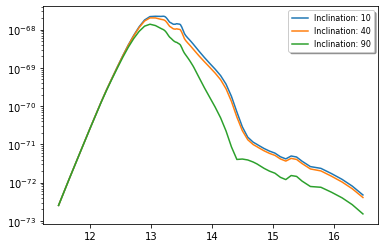

In [6]:
plt.semilogy(npzfile['arr_1'][0], npzfile['arr_2'][0], label = 'Inclination: 10')
plt.semilogy(npzfile['arr_1'][3], npzfile['arr_2'][3], label = 'Inclination: 40')
plt.semilogy(npzfile['arr_1'][8], npzfile['arr_2'][8], label = 'Inclination: 90')
plt.legend(fontsize = 8, shadow = True)

In [7]:
incl, torus_wv, torus_SED = npzfile['arr_0'], npzfile['arr_1'], npzfile['arr_2']
NK0 = {'SED' : torus_SED, 'wavelength' : torus_wv, 'incl-values' : incl}
f1 = open('Models/nenkova_v0.pickle', 'wb')
pickle.dump(NK0, f1, protocol=2)
f1.close()


In [8]:
NK0dict = pickle.load(open('Models/nenkova_v0.pickle', 'rb'), encoding='latin1')  
NK0dict

{'SED': array([[2.52925073e-73, 1.22105908e-72, 5.68080811e-72, ...,
         1.21524045e-72, 8.10714442e-73, 4.74898149e-73],
        [2.53057801e-73, 1.22177283e-72, 5.68740672e-72, ...,
         1.19830533e-72, 7.99963317e-73, 4.70119967e-73],
        [2.53363073e-73, 1.22293269e-72, 5.69040609e-72, ...,
         1.14399617e-72, 7.63728045e-73, 4.49945423e-73],
        ...,
        [2.53628528e-73, 1.22275425e-72, 5.68200785e-72, ...,
         5.55646942e-73, 3.69420591e-73, 2.11699985e-73],
        [2.53588710e-73, 1.22230815e-72, 5.67600911e-72, ...,
         4.33188546e-73, 2.87970867e-73, 1.64794170e-73],
        [2.53535619e-73, 1.22177283e-72, 5.67360962e-72, ...,
         3.99259920e-73, 2.65154591e-73, 1.51601080e-73]]),
 'wavelength': array([[11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
        [11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
        [11.4768, 11.6493, 11.8217, ..., 16.1344, 16.3007, 16.4768],
        ...,
        [11.4768, 11.649

# SKIRTOR

(1e-17, 1e-10)

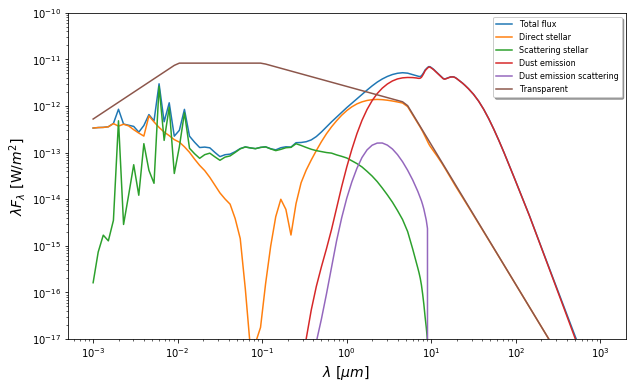

In [9]:
SED = pd.read_csv("Models/SKIRTOR/skirtor_2016-7-18/t3_p0_q0.5_oa40_R10_Mcl0.97_i50_sed.dat", delim_whitespace=True, decimal=".", names= ['wl', 'TwlFwl', 'DSwlFwl', 'SSwlFwl', 'TDwlFwl', 'SDwlFwl', 'TrwlFwl'], skiprows = 7)
c = 2.997e8
wl = SED.iloc[:, 0]*1e-6  #m
nu = c/wl
nu = nu[::-1]
log_nu = np.log10(nu)

d = 3.086*1e22 # 10 Mpc in m just information
F_l = SED.iloc[:, 4]/wl
F_nu = (F_l*wl**2)/c  #W/m²Hz --> erg/s cm²Hz
F_nu = F_nu[::-1]
F_nu2 = F_nu/(4*np.pi*d**2)

fig = plt.figure(figsize=(10, 6))
plt.loglog(SED.iloc[:, 0], SED.iloc[:, 1], label = 'Total flux')
plt.loglog(SED.iloc[:, 0], SED.iloc[:, 2], label = 'Direct stellar')
plt.loglog(SED.iloc[:, 0], SED.iloc[:, 3], label = 'Scattering stellar')
plt.loglog(SED.iloc[:, 0], SED.iloc[:, 4], label = 'Dust emission')
plt.loglog(SED.iloc[:, 0], SED.iloc[:, 5], label = 'Dust emission scattering')
plt.loglog(SED.iloc[:, 0], SED.iloc[:, 6], label = 'Transparent')
plt.legend(fontsize = 8, shadow = True)
plt.xlabel(r'$\lambda$ [$\mu m$] ', fontsize = 14) 
plt.ylabel(r'$\lambda F_\lambda$ [W/$m^2$] ', fontsize = 14) 
plt.ylim(1e-17, 1e-10)

(1e-10, 1e-05)

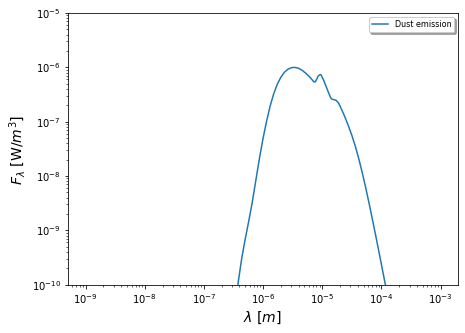

In [10]:
fig = plt.figure(figsize=(7, 5))
plt.loglog(wl, SED.iloc[:, 4]/wl, label = 'Dust emission')
plt.legend(fontsize = 8, shadow = True)
plt.xlabel(r'$\lambda$ [$m$] ', fontsize = 14) 
plt.ylabel(r'$F_\lambda$ [W/$m^3$] ', fontsize = 14) 
plt.ylim(1e-10, 1e-5)

(1e-17, 1e-10)

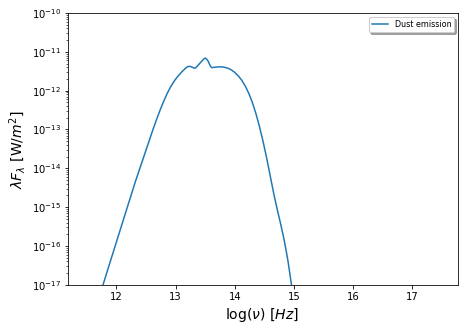

In [11]:
fig = plt.figure(figsize=(7, 5))
plt.semilogy(log_nu, SED.iloc[:, 4][::-1], label = 'Dust emission')
plt.legend(fontsize = 8, shadow = True)
plt.xlabel(r'log($\nu$) [$Hz$] ', fontsize = 14) 
plt.ylabel(r'$\lambda F_\lambda$ [W/$m^2$] ', fontsize = 14) 
plt.ylim(1e-17, 1e-10)

(1e-18, 1e-10)

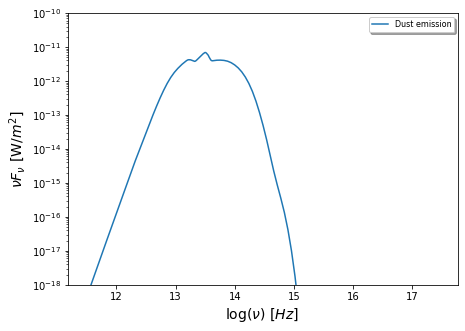

In [12]:
fig = plt.figure(figsize=(7, 5))
plt.semilogy(log_nu, (nu*F_nu), label = 'Dust emission')
plt.legend(fontsize = 8, shadow = True)
plt.xlabel(r'log($\nu$) [$Hz$] ', fontsize = 14) 
plt.ylabel(r'$\nu F_\nu$ [W/$m^2$] ', fontsize = 14) 
plt.ylim(1e-18, 1e-10)

(1e-76, 1e-70)

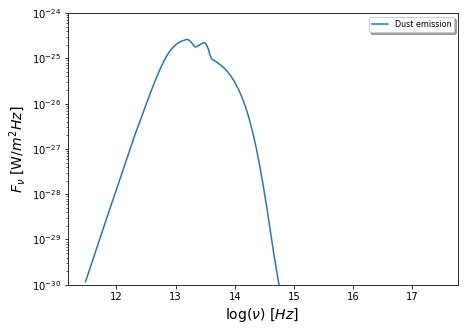

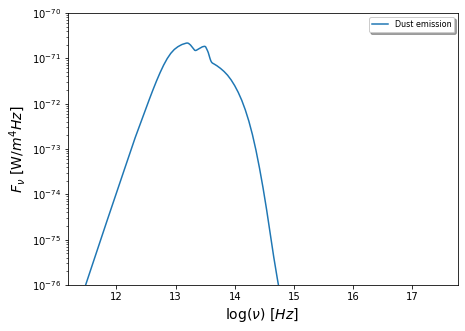

In [14]:
fig = plt.figure(figsize=(7, 5))
plt.semilogy(log_nu, F_nu, label = 'Dust emission')
plt.legend(fontsize = 8, shadow = True)
plt.xlabel(r'log($\nu$) [$Hz$] ', fontsize = 14) 
plt.ylabel(r'$F_\nu$ [W/$m^2 Hz$] ', fontsize = 14) 
plt.ylim(1e-30, 1e-24)
#plt.ylim(1e-10, 1e-4)

fig = plt.figure(figsize=(7, 5))
plt.semilogy(log_nu, F_nu2, label = 'Dust emission')
plt.legend(fontsize = 8, shadow = True)
plt.xlabel(r'log($\nu$) [$Hz$] ', fontsize = 14) 
plt.ylabel(r'$F_\nu$ [W/$m^4 Hz$] ', fontsize = 14) 
plt.ylim(1e-76, 1e-70)

In [15]:
DustM = pd.read_csv("Models/SKIRTOR/total_dust_mass_2016-7-18.txt", sep = '    ', decimal=".", names= ['model', 'Mass'], skiprows = 2, engine = 'python')

In [16]:
nombre = 't3_p0_q0.5_oa40_R10_Mcl0.97_i50_sed.dat'
sep = [m.start() for m in re.finditer('_', nombre)]
print(nombre[nombre.find('t')+1: sep[0]])
print(nombre[nombre.find('p')+1: sep[1]])
print(nombre[nombre.find('q')+1: sep[2]])
print(nombre[nombre.find('oa')+2: sep[3]])
print(nombre[nombre.find('R')+1: sep[4]])
print(nombre[nombre.find('Mcl')+3: sep[5]])
print(nombre[nombre.find('i')+1: sep[6]])
print(nombre[: sep[5]])
print(DustM[DustM['model'] == nombre[: sep[5]]]['Mass'])

3
0
0.5
40
10
0.97
50
t3_p0_q0.5_oa40_R10_Mcl0.97
489    419.004 Msun
Name: Mass, dtype: object


In [13]:
float(DustM[DustM['model'] == nombre[: sep[5]]]['Mass'].values.item()[:-5])

419.004

In [109]:
column_names = ["wavelength", 'SED', 'tv-values', 'p-values', 'q-values', 'oa-values', 'r-values', 'mcl-values', 'incl-values', 'Dm-values']  #To create the columns of the dataframe
SKIRTOR = pd.DataFrame(columns = column_names)
DustM = pd.read_csv("Models/SKIRTOR/total_dust_mass_2016-7-18.txt", sep = '    ', decimal=".", names= ['model', 'Mass'], skiprows = 2, engine = 'python')
j = 0

for i in os.listdir("Models/SKIRTOR/prueba"):
    data = pd.read_csv("Models/SKIRTOR/prueba/" + i, delim_whitespace=True, decimal=".", names= ['wl', 'TwlFwl', 'DSwlFwl', 'SSwlFwl', 'TDwlFwl', 'SDwlFwl', 'TrwlFwl'], skiprows = 7)
    
    c = 2.997e8
    log_nu = np.log10(c/(data.iloc[:, 0]*1e-6))
    log_nu = log_nu[::-1]

    d = 3.086*1e25 # 10 Mpc
    F_l = data.iloc[:, 4]/(data.iloc[:, 0]*4*np.pi*d**2)
    F_nu = F_l[::-1]
    
    sep = [m.start() for m in re.finditer('_', i)]
    tv = float(i[i.find('t')+1: sep[0]])
    p = float(i[i.find('p')+1: sep[1]])
    q = float(i[i.find('q')+1: sep[2]])
    oa = float(i[i.find('oa')+2: sep[3]])
    r = float(i[i.find('R')+1: sep[4]])
    mcl = float(i[i.find('Mcl')+3: sep[5]])
    incl = float(i[i.find('i')+1: sep[6]])
    Md = float(DustM[DustM['model'] == i[: sep[5]]]['Mass'].values.item()[:-5])
    
    New_row = {'SED': F_nu, 'wavelength': log_nu, 'tv-values': tv, 'p-values': p, 'q-values': q, 'oa-values': oa, 'r-values': r, 'mcl-values': mcl, 'incl-values': incl, 'Dm-values': Md} 
    SKIRTOR = SKIRTOR.append(New_row, ignore_index = True) 
    j =+ 1
    if j == 3840:
        print('20$\%$ of the finished process...')
    elif j == 7680:
        print('40$\%$ of the finished process...')
    elif j == 11520:
        print('60$\%$ of the finished process...')
    elif j == 15360:
        print('80$\%$ of the finished process...')
    elif j == 19199:
        print('Completed process.')

In [110]:
SKIRTOR

,wavelength,SED,tv-values,p-values,q-values,oa-values,r-values,mcl-values,incl-values,Dm-values
0,131 11.476687 130 11.536687 129 11.59...,131 2.321010e-74 130 5.244959e-74 129 ...,3.0,0.5,0.5,20.0,20.0,0.97,10.0,662.1960
1,131 11.476687 130 11.536687 129 11.59...,131 2.320947e-74 130 5.244773e-74 129 ...,3.0,0.5,0.5,20.0,20.0,0.97,50.0,662.1960
2,131 11.476687 130 11.536687 129 11.59...,131 8.852830e-75 130 2.006639e-74 129 ...,3.0,0.5,0.5,20.0,10.0,0.97,30.0,187.6690
3,131 11.476687 130 11.536687 129 11.59...,131 1.603092e-74 130 3.600531e-74 129 ...,3.0,0.5,0.5,10.0,30.0,0.97,60.0,738.7750
4,131 11.476687 130 11.536687 129 11.59...,131 8.644745e-75 130 1.946334e-74 129 ...,3.0,0.5,0.5,10.0,20.0,0.97,40.0,345.4870
5,131 11.476687 130 11.536687 129 11.59...,131 3.091124e-75 130 6.987020e-75 129 ...,3.0,0.5,0.5,10.0,10.0,0.97,0.0,98.0076
6,131 11.476687 130 11.536687 129 11.59...,131 1.603115e-74 130 3.600600e-74 129 ...,3.0,0.5,0.5,10.0,30.0,0.97,50.0,738.7750
7,131 11.476687 130 11.536687 129 11.59...,131 8.852628e-75 130 2.006578e-74 129 ...,3.0,0.5,0.5,20.0,10.0,0.97,50.0,187.6690
8,131 11.476687 130 11.536687 129 11.59...,131 1.603139e-74 130 3.600670e-74 129 ...,3.0,0.5,0.5,10.0,30.0,0.97,30.0,738.7750
9,131 11.476687 130 11.536687 129 11.59...,131 8.851937e-75 130 2.006372e-74 129 ...,3.0,0.5,0.5,20.0,10.0,0.97,70.0,187.6690


In [17]:
SKIRTORdict = pickle.load(open('Models/SKIRTOR.pickle', 'rb'), encoding='latin1')  
SKIRTORdict

,wavelength,SED,tv-values,p-values,q-values,oa-values,r-values,mcl-values,incl-values,Dm-values
0,131 11.476687 130 11.536687 129 11.59...,131 1.473447e-73 130 3.345958e-73 129 ...,5.0,1.0,0.5,70.0,20.0,0.97,80.0,1722.370
1,131 11.476687 130 11.536687 129 11.59...,131 7.871868e-74 130 1.784636e-73 129 ...,11.0,0.0,0.0,30.0,10.0,0.97,30.0,1393.130
2,131 11.476687 130 11.536687 129 11.59...,131 1.132995e-73 130 2.562784e-73 129 ...,9.0,0.0,1.5,30.0,20.0,0.97,20.0,3046.850
3,131 11.476687 130 11.536687 129 11.59...,131 1.410123e-73 130 3.200201e-73 129 ...,5.0,1.5,0.5,70.0,30.0,0.97,0.0,1723.650
4,131 11.476687 130 11.536687 129 11.59...,131 2.920523e-74 130 6.635538e-74 129 ...,3.0,0.0,0.5,40.0,10.0,0.97,50.0,419.004
...,...,...,...,...,...,...,...,...,...,...
19195,131 11.476687 130 11.536687 129 11.59...,131 9.682859e-74 130 2.200064e-73 129 ...,9.0,0.0,1.0,50.0,10.0,0.97,50.0,1225.920
19196,131 11.476687 130 11.536687 129 11.59...,131 2.770625e-74 130 6.262423e-74 129 ...,3.0,0.0,1.0,20.0,20.0,0.97,50.0,832.003
19197,131 11.476687 130 11.536687 129 11.59...,131 2.612205e-73 130 5.939009e-73 129 ...,11.0,0.0,0.5,80.0,10.0,0.97,20.0,2180.960
19198,131 11.476687 130 11.536687 129 11.59...,131 3.119932e-74 130 6.988031e-74 129 ...,7.0,0.5,1.0,10.0,30.0,0.97,0.0,1653.870


In [18]:
SKIRTORdict['Dm-values'].unique()

array([1722.37 , 1393.13 , 3046.85 , ..., 1181.25 , 1044.35 ,  443.801])

In [19]:
import itertools

idxs = [np.array([1,2,3]), np.array([3,5]), np.array([1,7])]
par_idxs_combinations = np.array(list(itertools.product(*idxs)))
par_idxs_combinations

array([[1, 3, 1],
       [1, 3, 7],
       [1, 5, 1],
       [1, 5, 7],
       [2, 3, 1],
       [2, 3, 7],
       [2, 5, 1],
       [2, 5, 7],
       [3, 3, 1],
       [3, 3, 7],
       [3, 5, 1],
       [3, 5, 7]])

In [20]:
prueba1 = SKIRTORdict[(SKIRTORdict['tv-values'] == 3) & (SKIRTORdict['p-values'] == 0)& (SKIRTORdict['q-values'] == 0.5)& (SKIRTORdict['oa-values'] == 40) & (SKIRTORdict['r-values'] == 10) & (SKIRTORdict['mcl-values'] == 0.97) & (SKIRTORdict['incl-values'] == 50)]
prueba1

,wavelength,SED,tv-values,p-values,q-values,oa-values,r-values,mcl-values,incl-values,Dm-values
4,131 11.476687 130 11.536687 129 11.59...,131 2.920523e-74 130 6.635538e-74 129 ...,3.0,0.0,0.5,40.0,10.0,0.97,50.0,419.004


In [21]:
tor_nu0, tor_Fnu0 =  prueba1['wavelength'].values.item().to_numpy(),prueba1['SED'].values.item().to_numpy()
tor_nu0, tor_Fnu0

(array([11.47668674, 11.53668674, 11.59668674, 11.65668674, 11.71668674,
        11.77668674, 11.83668674, 11.89668674, 11.95668674, 12.01668674,
        12.07668674, 12.13668674, 12.19668674, 12.25668674, 12.31668674,
        12.37668674, 12.43668674, 12.49668674, 12.55668674, 12.61668674,
        12.67668674, 12.73668674, 12.79668674, 12.85668674, 12.91668674,
        12.97668674, 13.03668674, 13.07874673, 13.09304336, 13.10734   ,
        13.12163662, 13.13593325, 13.15022988, 13.16452652, 13.17882314,
        13.19311978, 13.20741641, 13.22171304, 13.23600967, 13.2503063 ,
        13.26460293, 13.27889956, 13.29319619, 13.30749282, 13.32178945,
        13.33608608, 13.35038271, 13.36467934, 13.37897597, 13.3932726 ,
        13.40756923, 13.42186586, 13.43616249, 13.45045912, 13.46475575,
        13.47905238, 13.49334901, 13.50764564, 13.52194227, 13.5362389 ,
        13.55053553, 13.56483216, 13.57912879, 13.59342542, 13.60772205,
        13.62201868, 13.63631531, 13.65061194, 13.6

In [22]:
SKIRTORCdict = pickle.load(open('Models/SKIRTOR_CIGALE.pickle', 'rb'), encoding='latin1')  
SKIRTORCdict = SKIRTORCdict.sort_values('incl-values', ascending=True)
SKIRTORCdict

,wavelength,SED,tv-values,p-values,q-values,oa-values,r-values,mcl-values,incl-values,Dm-values
6,131 11.476687 130 11.536687 129 11.59...,131 2.722766e-76 130 4.681085e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,0.0,1520.55
2,131 11.476687 130 11.536687 129 11.59...,131 2.722764e-76 130 4.681074e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,10.0,1520.55
4,131 11.476687 130 11.536687 129 11.59...,131 2.722751e-76 130 4.681050e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,20.0,1520.55
3,131 11.476687 130 11.536687 129 11.59...,131 2.722717e-76 130 4.680973e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,30.0,1520.55
9,131 11.476687 130 11.536687 129 11.59...,131 2.722656e-76 130 4.680827e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,40.0,1520.55
0,131 11.476687 130 11.536687 129 11.59...,131 2.722541e-76 130 4.680580e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,50.0,1520.55
5,131 11.476687 130 11.536687 129 11.59...,131 2.722382e-76 130 4.680208e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,60.0,1520.55
8,131 11.476687 130 11.536687 129 11.59...,131 2.722230e-76 130 4.679863e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,70.0,1520.55
7,131 11.476687 130 11.536687 129 11.59...,131 2.722127e-76 130 4.679622e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,80.0,1520.55
1,131 11.476687 130 11.536687 129 11.59...,131 2.722082e-76 130 4.679535e-76 129 ...,7.0,1.0,1.0,40.0,20.0,0.97,90.0,1520.55


<class 'pandas.core.series.Series'>


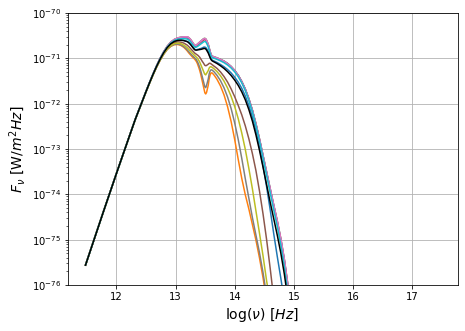

In [23]:
SEDs = [np.zeros((132))]*2
fig = plt.figure(figsize=(7, 5))
for i in range(10):
    plt.semilogy(SKIRTORCdict['wavelength'][i], SKIRTORCdict['SED'][i])
    SEDs[1] += SKIRTORCdict['SED'][i]/10
#SEDmean = SEDs/10
plt.semilogy(SKIRTORCdict['wavelength'][0], SEDs[1], color = 'black')
plt.ylim(1e-29, 1e-24)
plt.grid(True)
plt.xlabel(r'log($\nu$) [$Hz$] ', fontsize = 14) 
plt.ylabel(r'$F_\nu$ [W/$m^2 Hz$] ', fontsize = 14) 
plt.ylim(1e-76, 1e-70)
print(type(SEDs[1]))

In [24]:
SKIRTORMdict = pickle.load(open('Models/SKIRTOR_mean.pickle', 'rb'), encoding='latin1')  
SKIRTORMdict

,wavelength,SED,incl-values,Dm-values
0,131 11.476687 130 11.536687 129 11.59...,131 4.696267e-76 130 8.074933e-76 129 ...,0.0,2418.060767
1,131 11.476687 130 11.536687 129 11.59...,131 4.699164e-76 130 8.079921e-76 129 ...,10.0,2418.060767
2,131 11.476687 130 11.536687 129 11.59...,131 4.697193e-76 130 8.076537e-76 129 ...,20.0,2418.060767
3,131 11.476687 130 11.536687 129 11.59...,131 4.697300e-76 130 8.076686e-76 129 ...,30.0,2418.060767
4,131 11.476687 130 11.536687 129 11.59...,131 4.683712e-76 130 8.053274e-76 129 ...,40.0,2418.060767
5,131 11.476687 130 11.536687 129 11.59...,131 4.698353e-76 130 8.078358e-76 129 ...,50.0,2418.060767
6,131 11.476687 130 11.536687 129 11.59...,131 4.709018e-76 130 8.096599e-76 129 ...,60.0,2418.060767
7,131 11.476687 130 11.536687 129 11.59...,131 4.700622e-76 130 8.082067e-76 129 ...,70.0,2418.060767
8,131 11.476687 130 11.536687 129 11.59...,131 4.694166e-76 130 8.070867e-76 129 ...,80.0,2418.060767
9,131 11.476687 130 11.536687 129 11.59...,131 4.697808e-76 130 8.077090e-76 129 ...,90.0,2418.060767


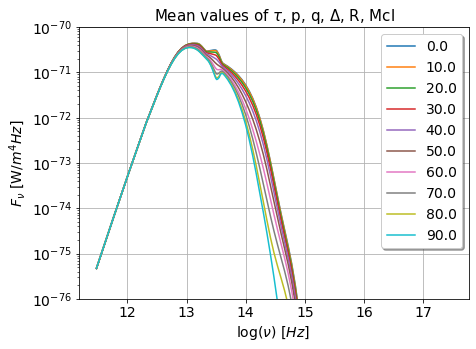

In [28]:
fig = plt.figure(figsize=(7, 5))
for i in range(10):
    plt.semilogy(SKIRTORMdict['wavelength'][i], SKIRTORMdict['SED'][i], label = str(SKIRTORMdict['incl-values'][i]))
plt.title(r'Mean values of $\tau$, p, q, $\Delta$, R, Mcl', fontsize = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(fontsize = 14, shadow = True)
plt.grid(True)
plt.ylim(1e-76, 1e-70)
plt.xlabel(r'log($\nu$) [$Hz$] ', fontsize = 14) 
plt.ylabel(r'$F_\nu$ [W/$m^4 Hz$] ', fontsize = 14) 
plt.show()

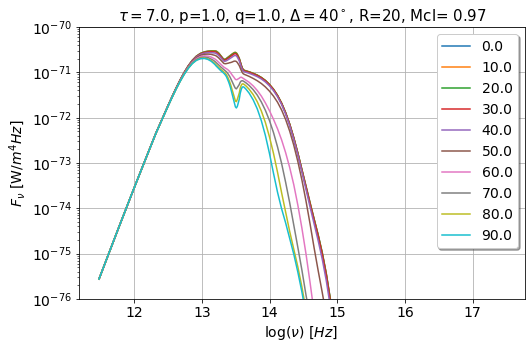

In [29]:
fig = plt.figure(figsize=(8, 5))
for i in range(10):
    plt.semilogy(SKIRTORCdict['wavelength'].iloc[i], SKIRTORCdict['SED'].iloc[i], label = str(SKIRTORCdict['incl-values'].iloc[i]))
plt.title(r'$\tau=7.0$, p=1.0, q=1.0, $\Delta=40^\circ$, R=20, Mcl= 0.97', fontsize = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(1e-76, 1e-70)
plt.grid(True)
plt.xlabel(r'log($\nu$) [$Hz$] ', fontsize = 14) 
plt.ylabel(r'$F_\nu$ [W/$m^4 Hz$] ', fontsize = 14) 
plt.show()